In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df = df.drop(['CustomerID', 'Genre'], axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cls = ss.fit_transform(df)
cls = pd.DataFrame(cls, columns=df.columns)
cls.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

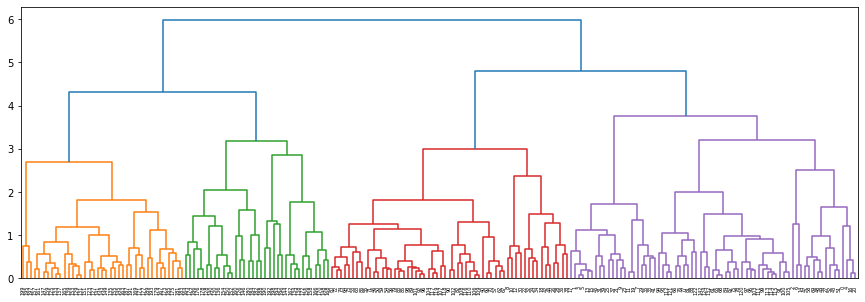

In [9]:
plt.figure(figsize=(15, 5))
mergings = linkage(cls, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

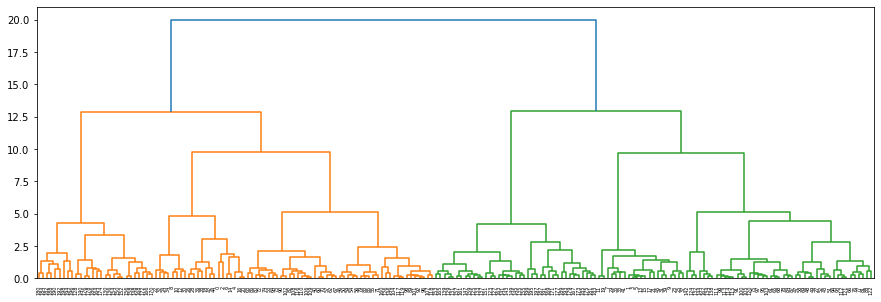

In [18]:
plt.figure(figsize=(15, 5))
mergings = linkage(cls, method='ward', metric='euclidean')
dendrogram(mergings)
plt.show()

In [19]:
clustercut = pd.Series(cut_tree(mergings, n_clusters=4).reshape(-1,))
clustercut.value_counts()

0    67
1    66
2    39
3    28
dtype: int64

In [22]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop('CustomerID', axis=1)
df['Genre'] = df['Genre'].map({'Male':1, 'Female':0})
df['cluster'] = clustercut

### Cluster Profiling

In [25]:
df.groupby('cluster').agg('mean')

,Genre,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,0.447761,52.432836,45.597015,39.134328
1,0.393939,26.560606,47.363636,56.787879
2,0.461538,32.692308,86.538462,82.128205
3,0.500000,43.892857,91.285714,16.678571


In [26]:
df['cluster'].value_counts()

0    67
1    66
2    39
3    28
Name: cluster, dtype: int64

### k-Means Clustering

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
wcss = []
sscore = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cls)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(cls, kmeans.labels_)
    sscore.append(score)

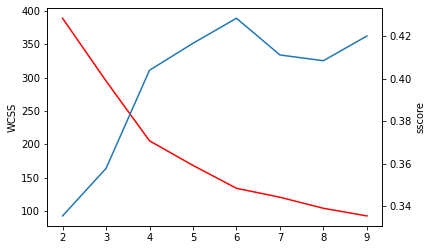

In [34]:
fig, ax = plt.subplots()
ax.plot(range(2,10), wcss, 'r')
ax.set_ylabel('WCSS')
ax1 = ax.twinx()
ax1.plot(range(2,10), sscore)
ax1.set_ylabel('sscore')
plt.show()

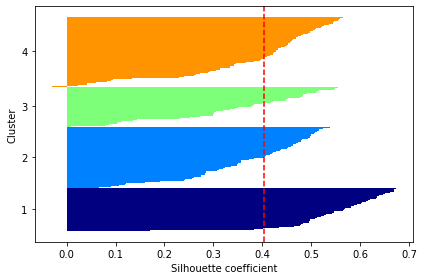

In [35]:
import plusmodules as pm
pm.svisualizer(cls, 4)

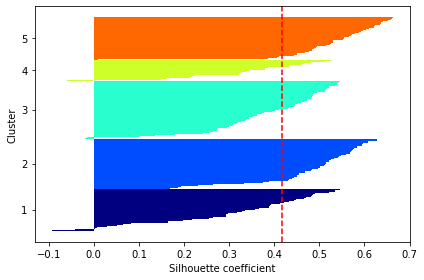

In [36]:
import plusmodules as pm
pm.svisualizer(cls, 5)

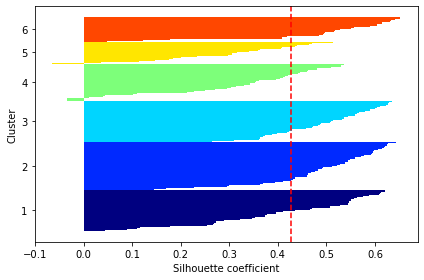

In [37]:
import plusmodules as pm
pm.svisualizer(cls, 6)